# Evaluate model on training and validation data

Observe whether there is a huge different between your fit and validation error.

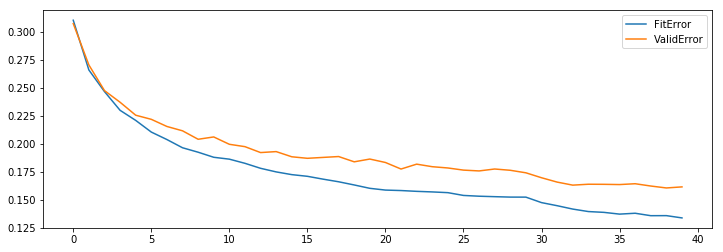

In [25]:
res.OptIterHistory[[ 'FitError', 'ValidError']].plot(figsize = (12, 4));

# Evaluate model on the test set

#### 1. Intersection over Union (IoU) is the measure of accuracy for object detecion task. 

In [27]:
yolo_model.predict(data=testSetTbl, gpu = 0)

[ScoreInfo]

                          Descr         Value
 0  Number of Observations Read         10708
 1  Number of Observations Used         10708
 2     Average IOU in Detection      0.841737
 3                   Loss Error      7.048107

[OutputCasTables]

   casLib              Name   Rows  Columns  \
 0   dnfs  Valid_Res_chalCN  10708     4065   
 
                                       casTable  
 0  CASTable('Valid_Res_chalCN', caslib='dnfs')  

+ Elapsed: 307s, user: 2.91e+03s, sys: 44.2s, mem: 3.03e+04mb

#### 2. Manually observe the results

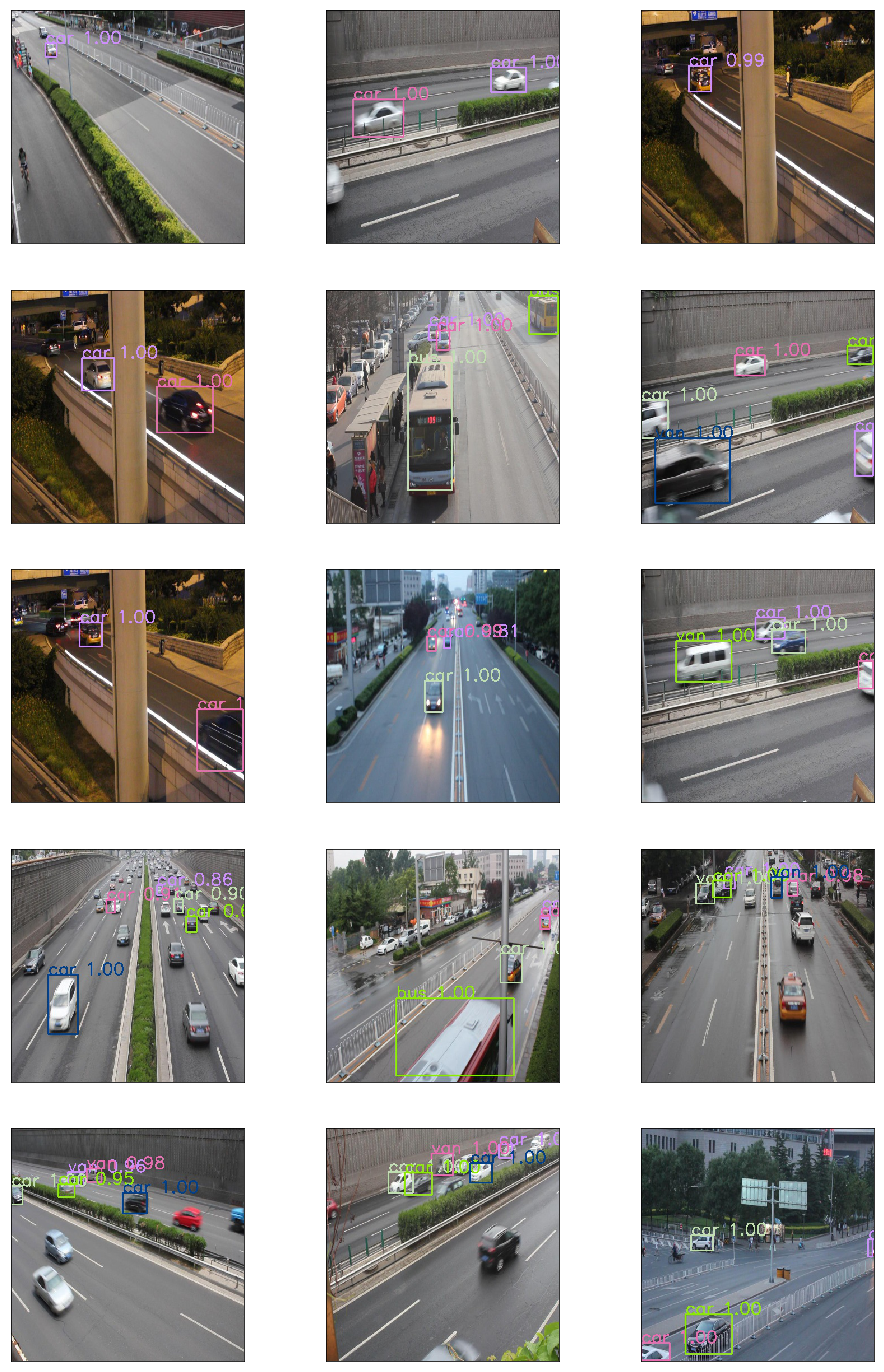

In [28]:
display_object_detections(conn=s, 
                          coord_type='yolo', 
                          max_objects=5, 
                          table=yolo_model.valid_res_tbl, 
                          num_plot=15,
                          n_col=3)

# Model Evaluation - Generate Precision/Recall curves for different IoU values

In [ ]:
#define your choice of interval
iou=[0.2,0.4,0.6,0.8]

metrics=[]

for i in range(0,4):
    metrics_i = yolo_model.evaluate_object_detection(ground_truth=testSetTbl, coord_type='yolo',
                                               classes=['car','van','bus'], 
                                               iou_thresholds=iou[i])
    metrics.append(metrics_i)

In [31]:
precision=[]
recall=[]
for j in range(0,3):
    for i in range(0,4):
        precision_i=metrics[i][0]['Class Evaluation'][j]['precision']
        precision.append(precision_i)
        recall_i=metrics[i][0]['Class Evaluation'][j]['recall']
        recall.append(recall_i)

Text(0,0.5,'Precision')

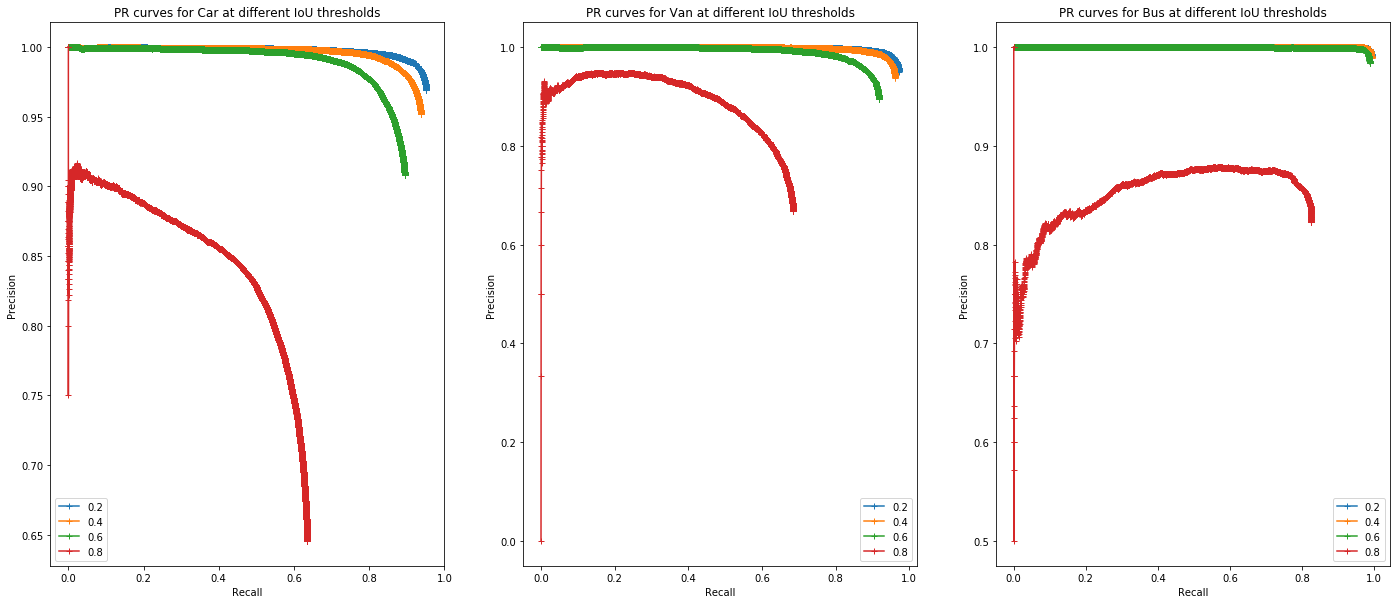

In [32]:
from matplotlib import pyplot as plt

iou=[0.2, 0.4, 0.6, 0.8]*3
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(24, 10))

ax=axs[0]
for i in range(0,4):
    plot1,=ax.plot(recall[i], precision[i], marker='+', label=iou[i])
ax.legend()
ax.set_title("PR curves for Car at different IoU thresholds")
ax.set_xlabel("Recall")
ax.set_ylabel("Precision")

ax=axs[1]
for i in range(4,8):
    plot2, =ax.plot(recall[i], precision[i], marker='+', label=iou[i])
ax.legend()
ax.set_title("PR curves for Van at different IoU thresholds")
ax.set_xlabel("Recall")
ax.set_ylabel("Precision")

ax=axs[2]
for i in range(8,12):
    plot2, =ax.plot(recall[i], precision[i], marker='+', label=iou[i])
ax.legend()
ax.set_title("PR curves for Bus at different IoU thresholds")
ax.set_xlabel("Recall")
ax.set_ylabel("Precision")